## `Problem Statement:`


Analyze the characteristics and distribution of PG accommodations across different cities to identify key factors such as pricing, amenities, and location preferences. The goal is to provide insights into trends, potential areas of improvement, and opportunities for PG management to attract more residents.

# Project : ON  EDA

#  Title: Analysis on pg's Different City's

##### Step 1: Import Libraries and Load the Data

In [5]:
import numpy as np
import pandas as pd

In [7]:
data=pd.read_csv(r"C:\New_PG_Project\ALL_PAGES_DATASET_CITY_WISE_PG_COLLECT.CSV")
df=data.copy()

##### simple EDA

In [10]:
df.head()

,Title,Title_Based_Price,Living,Single_Share,Single_Share_AC,Twin_Share_AC,Twin_Share,Triple_Share,Triple_Share_AC,Four_Share_AC,Four_Share,PG_INFO,location,City_name
0,Chhaya Niketan Homestay PG/Paying Guest,"₹6,200 OnwardsFood IncludedBeds Available 4.0 ...",Coed,"9,000",NaN,NaN,"7,000","6,200",NaN,NaN,NaN,Single Deluxe Ac Room 12000 call no 7534008800...,in Sikandra,AGRA
1,Surakshaa Home Stay For Boys PG/Paying Guest,"₹4,500 OnwardsFood Charge extraBeds Available",Boys,"6,000",NaN,NaN,"5,500","4,500",NaN,NaN,NaN,We can assure that u will get best Facilities ...,in Sikandra,AGRA
2,PG/Paying Guest Center,"₹3,000 Twin Sharing",Boys,NaN,NaN,"3,000",NaN,NaN,NaN,NaN,NaN,NaN,in Khandari,AGRA
3,Sharma's PG/Paying Guest,"₹4,000 OnwardsFood Charge extra",Boys,"7,000",NaN,NaN,"5,000","4,000",NaN,NaN,NaN,NaN,in Sikandra,AGRA
4,Shree Vashino PG/Paying Guest For Girls,"₹3,000 OnwardsFood Charge extra",Girls,NaN,"4,000","3,000",NaN,NaN,NaN,NaN,NaN,NaN,in Runukta,AGRA


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22623 entries, 0 to 22622
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Title              22623 non-null  object
 1   Title_Based_Price  22623 non-null  object
 2   Living             22594 non-null  object
 3   Single_Share       6252 non-null   object
 4   Single_Share_AC    5556 non-null   object
 5   Twin_Share_AC      8174 non-null   object
 6   Twin_Share         9283 non-null   object
 7   Triple_Share       5936 non-null   object
 8   Triple_Share_AC    4895 non-null   object
 9   Four_Share_AC      1328 non-null   object
 10  Four_Share         1765 non-null   object
 11  PG_INFO            3394 non-null   object
 12  location           22623 non-null  object
 13  City_name          22623 non-null  object
dtypes: object(14)
memory usage: 2.4+ MB


In [14]:
df.shape

(22623, 14)

In [16]:
df.columns

Index(['Title', 'Title_Based_Price', 'Living', 'Single_Share',
       'Single_Share_AC', 'Twin_Share_AC', 'Twin_Share', 'Triple_Share',
       'Triple_Share_AC', 'Four_Share_AC', 'Four_Share', 'PG_INFO', 'location',
       'City_name'],
      dtype='object')

In [58]:

status_counts = df['Living'].value_counts()

# Calculate the percentage
status_percentage = (status_counts / status_counts.sum()) * 100
print(status_percentage)


Living
Boys     34.884868
Girls    33.982545
Coed     31.132587
Name: count, dtype: float64


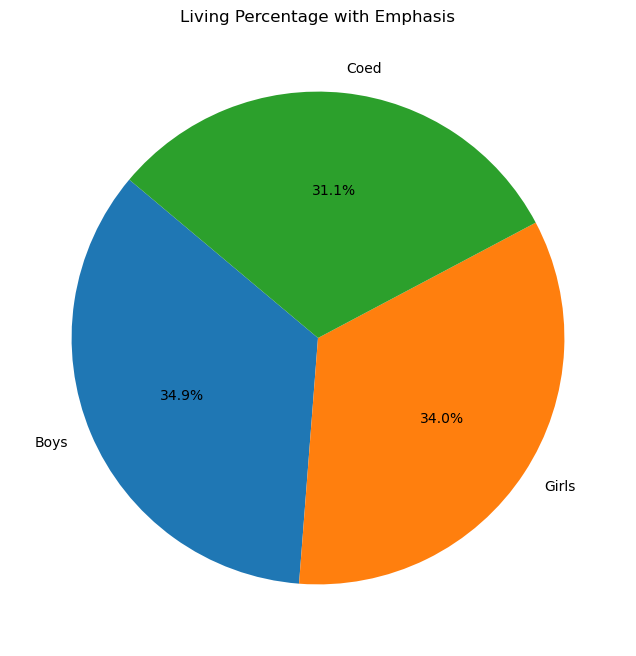

In [60]:
explode = [0.1 if i == 'Living' else 0 for i in status_counts.index]

plt.figure(figsize=(8, 8))
plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', explode=explode, startangle=140)
plt.title('Living Percentage with Emphasis')
plt.show()

#### Here are the average living conditions for different groups: Boys have an average score of approximately 34.88, Girls have an average of about 33.98, and Coed groups have an average of around 31.13.

##### Step 2: Check for Missing Values

In [19]:
df.isna().sum()

Title                    0
Title_Based_Price        0
Living                  29
Single_Share         16371
Single_Share_AC      17067
Twin_Share_AC        14449
Twin_Share           13340
Triple_Share         16687
Triple_Share_AC      17728
Four_Share_AC        21295
Four_Share           20858
PG_INFO              19229
location                 0
City_name                0
dtype: int64

##### step 3:Check for Duplicates

In [22]:
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

Number of duplicate rows: 2313


In [24]:
# remove duplicates
df.drop_duplicates(inplace=True)

In [26]:
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

Number of duplicate rows: 0


##### Step 4: Fill Missing Values AND change datatype

In [29]:
df2=df.copy() # create obj

In [31]:
a=df2.dropna(subset="PG_INFO")  # I use drop why because the pg_info columns have above 60% nan values and i prefer use drop

In [33]:
b=a.dropna(subset="Twin_Share") # I use drop why because the Twin_Share columns have above 60% nan values and i prefer use drop

In [35]:
c=b.copy()   # I create another object

###  Remove commas and convert to `numeric`### * Now fill the` NaN value`s with the` media`n of the columns like: Single_Share,Twin_Share,Triple_Share,Four_Share

In [39]:
c['Single_Share'] = c['Single_Share'].replace(',', '', regex=True).astype(float)


c['Single_Share'].fillna(c['Single_Share'].median(), inplace=True)

C:\Users\Nagendra\AppData\Local\Temp\ipykernel_53536\2571426432.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  c['Single_Share'].fillna(c['Single_Share'].median(), inplace=True)


In [41]:
c['Triple_Share'] = c['Triple_Share'].replace(',', '', regex=True).astype(float)

c['Triple_Share'].fillna(c['Triple_Share'].median(), inplace=True)

C:\Users\Nagendra\AppData\Local\Temp\ipykernel_53536\3824258687.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  c['Triple_Share'].fillna(c['Triple_Share'].median(), inplace=True)


In [43]:
c['Four_Share'] = c['Four_Share'].replace(',', '', regex=True).astype(float)

c['Four_Share'].fillna(c['Four_Share'].median(), inplace=True)

C:\Users\Nagendra\AppData\Local\Temp\ipykernel_53536\25344367.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  c['Four_Share'].fillna(c['Four_Share'].median(), inplace=True)


In [45]:
c['Twin_Share'] = c['Twin_Share'].replace(',', '', regex=True).astype(float)

c['Twin_Share'].fillna(c['Twin_Share'].median(), inplace=True)

C:\Users\Nagendra\AppData\Local\Temp\ipykernel_53536\502396414.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  c['Twin_Share'].fillna(c['Twin_Share'].median(), inplace=True)


## `Note`: i'm droping some features like AC this main issue as much as many nan values occure,but this is wrong thing this feature droping but i use my problems understnding i use ...

In [48]:
d = c.drop(['Single_Share_AC', 'Twin_Share_AC',"Triple_Share_AC","Four_Share_AC"], axis=1)

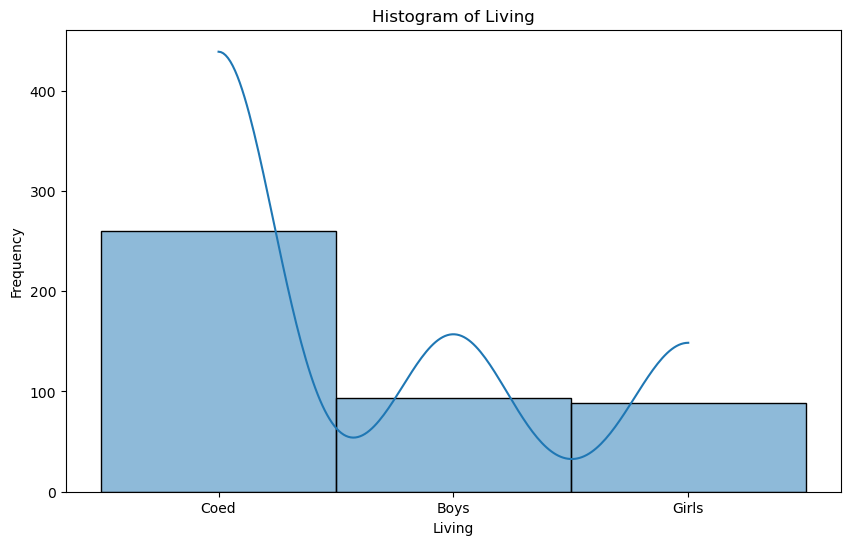

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(d['Living'], bins=30, kde=True)
plt.title('Histogram of Living')
plt.xlabel('Living')
plt.ylabel('Frequency')
plt.show()


##### """ This plot helps us understand how the "Living" data is distributed. The histogram shows how often values appear in different ranges, while the smooth KDE curve highlights the overall trend, making it easy to see the data's spread and patterns """

# save  the file 
##### why save the file after i using/performance Complete `EDA`
* this following steps

In [70]:
d.reset_index(drop=True, inplace=True)

In [72]:
d.to_csv("This_is_new_advanced_pg_in_different_city.csv",index=False)

In [ ]:
# EDA

## Clean the Data :

In [75]:
#  Import Libraries and Load the Data
import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [77]:
data=pd.read_csv(r"This_is_new_advanced_pg_in_different_city.csv")

In [79]:
df=data.copy() # create object

In [81]:
df

,Title,Title_Based_Price,Living,Single_Share,Twin_Share,Triple_Share,Four_Share,PG_INFO,location,City_name
0,Chhaya Niketan Homestay PG/Paying Guest,"₹6,200 OnwardsFood IncludedBeds Available 4.0 ...",Coed,9000.0,7000.0,6200.0,7000.0,Single Deluxe Ac Room 12000 call no 7534008800...,in Sikandra,AGRA
1,Surakshaa Home Stay For Boys PG/Paying Guest,"₹4,500 OnwardsFood Charge extraBeds Available",Boys,6000.0,5500.0,4500.0,7000.0,We can assure that u will get best Facilities ...,in Sikandra,AGRA
2,Madhur Smriti Girls Hostel PG/Paying Guest,"₹6,000 OnwardsFood IncludedBeds Available",Girls,8000.0,6000.0,7575.0,7000.0,Very Peaceful Neighborhood and Located Less th...,in Katra,Allahabad
3,The Basic PG/Paying Guest only for Profession...,"₹8,500 OnwardsFood Charge extraBeds Available ...",Coed,16000.0,8500.0,7575.0,7000.0,"Electricity food, Maintenance is extra if appl...",in Gajapati Nagar,bhubaneswar
4,Zolo Moorfield PG/Paying Guest,"₹10,456 OnwardsBeds Available",Coed,18437.0,12123.0,10456.0,7000.0,near JV Hospital Wifi AvailableAC Not Availabl...,in Kodambakkam,Chennai
...,...,...,...,...,...,...,...,...,...,...
436,PG/Paying Guestdotcom,"₹8,000 OnwardsFood Charge extraBeds Available ...",Coed,16000.0,10000.0,10000.0,9000.0,"Skylark Apt, A/606, Kavesar, Opp. Palacia, Hir...",in Hiranandani Estate,Thane
437,Your Space Hospitality PG/Paying Guest,"₹7,000 OnwardsFood Charge extraBeds Available ...",Boys,18000.0,8000.0,7000.0,7000.0,Luxurious fully furnished PG With all faciliti...,in Wagle Industrial Estate,Thane
438,Your Space Hospitality PG/Paying Guest,"₹7,000 OnwardsFood Charge extraBeds Available ...",Boys,12000.0,8000.0,7000.0,7000.0,Luxurious fully furnished PG With all faciliti...,in Hiranandani Estate,Thane
439,Your Space Hospitality PG/Paying Guest,"₹7,000 OnwardsFood Charge extraBeds Available",Boys,12000.0,8000.0,7000.0,7000.0,Luxurious fully furnished PG With all faciliti...,in Thane West,Thane


#### Step 1: Remove special characters from the 'Title_Based_Price' column and convert it to a numeric value
####         Extracting numeric price from strings

In [85]:
df['Title_Based_Price'] = df['Title_Based_Price'].apply(lambda x: float(re.sub(r'[^\d.]', '', x.split()[0])) if re.search(r'\d', x) else np.nan)

In [87]:
df

,Title,Title_Based_Price,Living,Single_Share,Twin_Share,Triple_Share,Four_Share,PG_INFO,location,City_name
0,Chhaya Niketan Homestay PG/Paying Guest,6200.0,Coed,9000.0,7000.0,6200.0,7000.0,Single Deluxe Ac Room 12000 call no 7534008800...,in Sikandra,AGRA
1,Surakshaa Home Stay For Boys PG/Paying Guest,4500.0,Boys,6000.0,5500.0,4500.0,7000.0,We can assure that u will get best Facilities ...,in Sikandra,AGRA
2,Madhur Smriti Girls Hostel PG/Paying Guest,6000.0,Girls,8000.0,6000.0,7575.0,7000.0,Very Peaceful Neighborhood and Located Less th...,in Katra,Allahabad
3,The Basic PG/Paying Guest only for Profession...,8500.0,Coed,16000.0,8500.0,7575.0,7000.0,"Electricity food, Maintenance is extra if appl...",in Gajapati Nagar,bhubaneswar
4,Zolo Moorfield PG/Paying Guest,10456.0,Coed,18437.0,12123.0,10456.0,7000.0,near JV Hospital Wifi AvailableAC Not Availabl...,in Kodambakkam,Chennai
...,...,...,...,...,...,...,...,...,...,...
436,PG/Paying Guestdotcom,8000.0,Coed,16000.0,10000.0,10000.0,9000.0,"Skylark Apt, A/606, Kavesar, Opp. Palacia, Hir...",in Hiranandani Estate,Thane
437,Your Space Hospitality PG/Paying Guest,7000.0,Boys,18000.0,8000.0,7000.0,7000.0,Luxurious fully furnished PG With all faciliti...,in Wagle Industrial Estate,Thane
438,Your Space Hospitality PG/Paying Guest,7000.0,Boys,12000.0,8000.0,7000.0,7000.0,Luxurious fully furnished PG With all faciliti...,in Hiranandani Estate,Thane
439,Your Space Hospitality PG/Paying Guest,7000.0,Boys,12000.0,8000.0,7000.0,7000.0,Luxurious fully furnished PG With all faciliti...,in Thane West,Thane


#### Step 2: Standardize column names

In [90]:
df.rename(columns={
    'Title_Based_Price': 'Price',
    'City_name': 'City',
    'location': 'Location'
}, inplace=True)

In [92]:
df.columns

Index(['Title', 'Price', 'Living', 'Single_Share', 'Twin_Share',
       'Triple_Share', 'Four_Share', 'PG_INFO', 'Location', 'City'],
      dtype='object')

#### Step 3: Check and standardize text format for 'City' and 'Location'
             *Capitalize City names consistently*
             *Standardize location names*

In [95]:
df['City'] = df['City'].str.title()
df['Location'] = df['Location'].str.title().str.replace("In ", "", regex=True)

In [97]:
df

,Title,Price,Living,Single_Share,Twin_Share,Triple_Share,Four_Share,PG_INFO,Location,City
0,Chhaya Niketan Homestay PG/Paying Guest,6200.0,Coed,9000.0,7000.0,6200.0,7000.0,Single Deluxe Ac Room 12000 call no 7534008800...,Sikandra,Agra
1,Surakshaa Home Stay For Boys PG/Paying Guest,4500.0,Boys,6000.0,5500.0,4500.0,7000.0,We can assure that u will get best Facilities ...,Sikandra,Agra
2,Madhur Smriti Girls Hostel PG/Paying Guest,6000.0,Girls,8000.0,6000.0,7575.0,7000.0,Very Peaceful Neighborhood and Located Less th...,Katra,Allahabad
3,The Basic PG/Paying Guest only for Profession...,8500.0,Coed,16000.0,8500.0,7575.0,7000.0,"Electricity food, Maintenance is extra if appl...",Gajapati Nagar,Bhubaneswar
4,Zolo Moorfield PG/Paying Guest,10456.0,Coed,18437.0,12123.0,10456.0,7000.0,near JV Hospital Wifi AvailableAC Not Availabl...,Kodambakkam,Chennai
...,...,...,...,...,...,...,...,...,...,...
436,PG/Paying Guestdotcom,8000.0,Coed,16000.0,10000.0,10000.0,9000.0,"Skylark Apt, A/606, Kavesar, Opp. Palacia, Hir...",Hiranandani Estate,Thane
437,Your Space Hospitality PG/Paying Guest,7000.0,Boys,18000.0,8000.0,7000.0,7000.0,Luxurious fully furnished PG With all faciliti...,Wagle Industrial Estate,Thane
438,Your Space Hospitality PG/Paying Guest,7000.0,Boys,12000.0,8000.0,7000.0,7000.0,Luxurious fully furnished PG With all faciliti...,Hiranandani Estate,Thane
439,Your Space Hospitality PG/Paying Guest,7000.0,Boys,12000.0,8000.0,7000.0,7000.0,Luxurious fully furnished PG With all faciliti...,Thane West,Thane


#### Step 4: Identify outliers in numeric columns
#### Outlier detection using IQR method for numeric price columns
    **Display the cleaned data sample and identified outliers**
    **Number of outliers per column**

    An outlier is a value that is much higher or lower than most of the other values in a dataset. It's like a number that stands out because it      doesn't fit in with the rest, often being far away from the average.

In [100]:
numeric_cols = ['Single_Share', 'Twin_Share', 'Triple_Share', 'Four_Share', 'Price']
outliers = {}
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers[col] = df[(df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))][col]


data_cleaned_sample = df.head()
outliers_summary = {col: len(outliers[col]) for col in outliers}  

In [102]:
print("outliers_summary:",outliers_summary)

outliers_summary: {'Single_Share': 19, 'Twin_Share': 5, 'Triple_Share': 77, 'Four_Share': 72, 'Price': 16}


In [104]:
print("data_cleaned_sample:",data_cleaned_sample)

data_cleaned_sample:                                                Title    Price Living  \
0           Chhaya Niketan Homestay PG/Paying Guest    6200.0   Coed   
1      Surakshaa Home Stay For Boys PG/Paying Guest    4500.0   Boys   
2        Madhur Smriti Girls Hostel PG/Paying Guest    6000.0  Girls   
3   The Basic PG/Paying Guest only for Profession...   8500.0   Coed   
4                    Zolo Moorfield PG/Paying Guest   10456.0   Coed   

   Single_Share  Twin_Share  Triple_Share  Four_Share  \
0        9000.0      7000.0        6200.0      7000.0   
1        6000.0      5500.0        4500.0      7000.0   
2        8000.0      6000.0        7575.0      7000.0   
3       16000.0      8500.0        7575.0      7000.0   
4       18437.0     12123.0       10456.0      7000.0   

                                             PG_INFO         Location  \
0  Single Deluxe Ac Room 12000 call no 7534008800...         Sikandra   
1  We can assure that u will get best Facilities ...     

#       Here are a few basic steps for EDA:

1. *View Dataset Summary*:

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 441 entries, 0 to 440
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Title         441 non-null    object 
 1   Price         441 non-null    float64
 2   Living        441 non-null    object 
 3   Single_Share  441 non-null    float64
 4   Twin_Share    441 non-null    float64
 5   Triple_Share  441 non-null    float64
 6   Four_Share    441 non-null    float64
 7   PG_INFO       441 non-null    object 
 8   Location      441 non-null    object 
 9   City          441 non-null    object 
dtypes: float64(5), object(5)
memory usage: 34.6+ KB


###  Identify categorical and numerical columns

In [113]:
# Categorical columns typically include columns of type 'object' or 'category'
categorical_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()

In [115]:
print("categorical_columns:",categorical_columns)

categorical_columns: ['Title', 'Living', 'PG_INFO', 'Location', 'City']


In [119]:
# Numerical columns typically include columns of type 'int64' or 'float64'
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

In [121]:
print("numerical_columns:",numerical_columns)

numerical_columns: ['Price', 'Single_Share', 'Twin_Share', 'Triple_Share', 'Four_Share']


2. *Statistical Summary for Numerical Columns*:

In [124]:
print(df.describe())

              Price  Single_Share    Twin_Share  Triple_Share    Four_Share
count    441.000000    441.000000    441.000000    441.000000    441.000000
mean    8110.376417  16097.546485   9522.873016   7729.716553   7024.981859
std     2928.443876   5255.203997   3330.665219   1840.815238    856.567834
min     2500.000000   2500.000000   2500.000000   2500.000000   2500.000000
25%     6000.000000  13000.000000   7200.000000   7000.000000   7000.000000
50%     7500.000000  16000.000000   9000.000000   7575.000000   7000.000000
75%     9500.000000  18250.000000  11900.000000   8000.000000   7000.000000
max    21790.000000  33600.000000  25060.000000  21790.000000  14000.000000


3. *Unique Value Counts for Categorical Columns*

In [127]:
for col in categorical_columns :
       print(f"Column: {col}")
       print(df[col].value_counts())
       print("\n")
       print("**"* 50)

Column: Title
Title
Your Space Hospitality PG/Paying Guest           3
THE SCENIC INN PREMIUM GIRLS PG/Paying Guest     2
Alcove Spaces PG/Paying Guest                    2
Zolo Skirling PG/Paying Guest                    2
Gurukrupa Properties PG/Paying Guest             2
                                                ..
Om Sai PG/Paying Guest                           1
Krish Luxury PG/Paying Guest CO-LIVING           1
HOUSEMATE BLISS CO-LIVING PG/Paying Guest        1
VENKATESHWARA DELUXE LUXURY PG/Paying Guest      1
OXOTEL THANE PG/Paying Guest                     1
Name: count, Length: 427, dtype: int64


****************************************************************************************************
Column: Living
Living
Coed     260
Boys      93
Girls     88
Name: count, dtype: int64


****************************************************************************************************
Column: PG_INFO
PG_INFO
A professionally managed PG with all modern amenities. Wifi Ava

#### 4. *Check for Duplicates*:

In [131]:
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

Number of duplicate rows: 0


In [133]:
df

,Title,Price,Living,Single_Share,Twin_Share,Triple_Share,Four_Share,PG_INFO,Location,City
0,Chhaya Niketan Homestay PG/Paying Guest,6200.0,Coed,9000.0,7000.0,6200.0,7000.0,Single Deluxe Ac Room 12000 call no 7534008800...,Sikandra,Agra
1,Surakshaa Home Stay For Boys PG/Paying Guest,4500.0,Boys,6000.0,5500.0,4500.0,7000.0,We can assure that u will get best Facilities ...,Sikandra,Agra
2,Madhur Smriti Girls Hostel PG/Paying Guest,6000.0,Girls,8000.0,6000.0,7575.0,7000.0,Very Peaceful Neighborhood and Located Less th...,Katra,Allahabad
3,The Basic PG/Paying Guest only for Profession...,8500.0,Coed,16000.0,8500.0,7575.0,7000.0,"Electricity food, Maintenance is extra if appl...",Gajapati Nagar,Bhubaneswar
4,Zolo Moorfield PG/Paying Guest,10456.0,Coed,18437.0,12123.0,10456.0,7000.0,near JV Hospital Wifi AvailableAC Not Availabl...,Kodambakkam,Chennai
...,...,...,...,...,...,...,...,...,...,...
436,PG/Paying Guestdotcom,8000.0,Coed,16000.0,10000.0,10000.0,9000.0,"Skylark Apt, A/606, Kavesar, Opp. Palacia, Hir...",Hiranandani Estate,Thane
437,Your Space Hospitality PG/Paying Guest,7000.0,Boys,18000.0,8000.0,7000.0,7000.0,Luxurious fully furnished PG With all faciliti...,Wagle Industrial Estate,Thane
438,Your Space Hospitality PG/Paying Guest,7000.0,Boys,12000.0,8000.0,7000.0,7000.0,Luxurious fully furnished PG With all faciliti...,Hiranandani Estate,Thane
439,Your Space Hospitality PG/Paying Guest,7000.0,Boys,12000.0,8000.0,7000.0,7000.0,Luxurious fully furnished PG With all faciliti...,Thane West,Thane


#  Univariate Analysis

**1.Categorical Columns (Title, PG_INFO, City, Location):**
* Calculate frequency counts.
* Visualize distributions using bar charts or count plots.

In [138]:
import seaborn as sns
import matplotlib.pyplot as plt

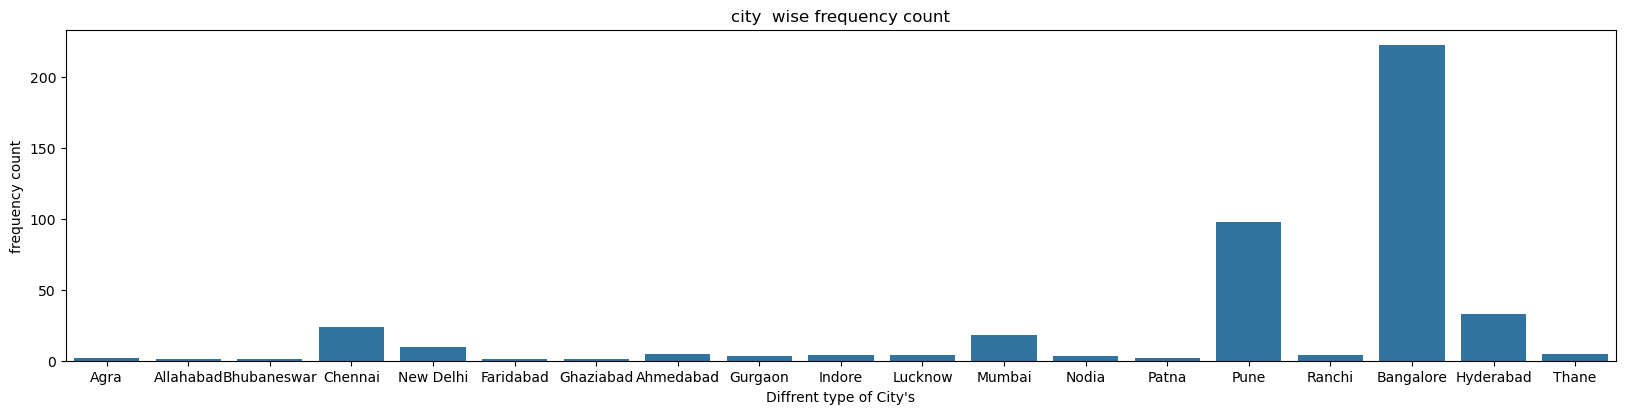

In [152]:
plt.figure(figsize=(20, 4.3))
plt.title("city  wise frequency count")
sns.countplot(x='City', data=df)
plt.xlabel("Diffrent type of City's")
plt.ylabel("frequency count")
plt.show()

The plot shows the number of occurrences for each city in the dataset. Bangalore and Pune have the highest counts, meaning there are more entries or data points for these cities compared to others.

### PG_INFO-wise Frequency Count

In [ ]:
plt.figure(figsize=(16,2))
plt.title("PG_INFO-wise Frequency Count")
sns.countplot(x='PG_INFO', data=df, order=df['PG_INFO'].value_counts().index)
plt.xlabel("PG Accommodations")
plt.ylabel("Frequency")
plt.show()

### Title-wise Frequency Count

In [ ]:
plt.figure(figsize=(18, 3))
plt.title("Title-wise Frequency Count")
sns.countplot(x='Title', data=df, order=df['Title'].value_counts().index)
plt.xlabel("Title by the dataset")
plt.ylabel("Frequency")
plt.show()

### using word cloud why i use more visualize it has more no.of occur

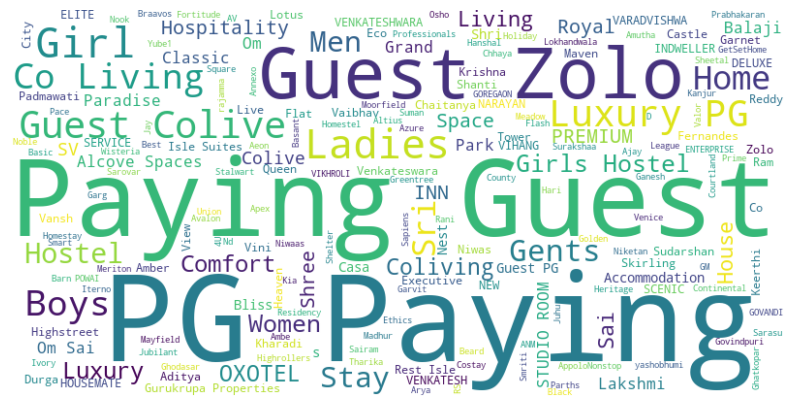

In [176]:

from wordcloud import WordCloud

text = " ".join(title for title in df['Title'].astype(str))


wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)


plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

This code creates a word cloud from the titles in the dataset. It first combines all the titles into a single string. Then, it generates a visual representation of the most common words, with larger words appearing more frequently. Finally, it displays the word cloud in a plot, showing the most prominent words in the titles.

###  2.Numerical Columns (Title_Based_Price, Living, Single_Share, Twin_Share, Triple_Share, Four_Share):
      * Generate histograms, box plots, and calculate summary statistics (mean, median, mode, etc.).

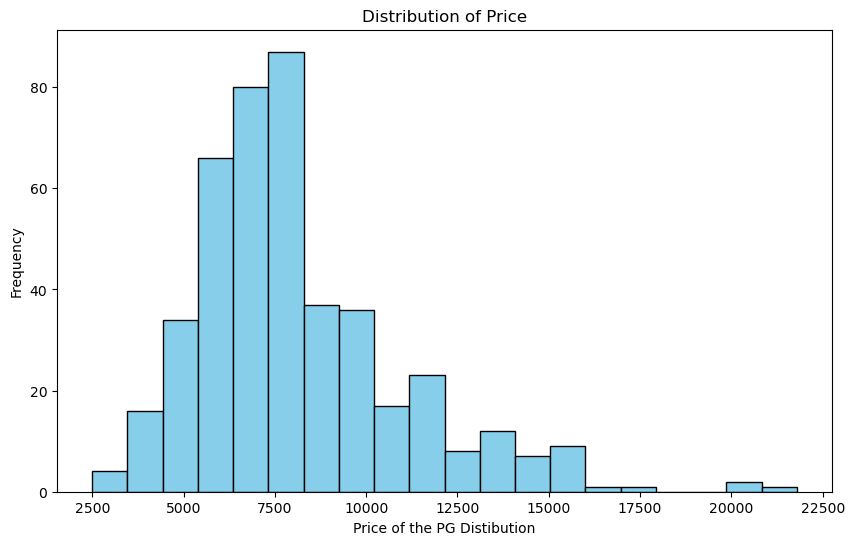

In [182]:
plt.figure(figsize=(10, 6))
plt.hist(df['Price'].dropna(), bins=20, color='skyblue', edgecolor='black')
plt.title("Distribution of Price")
plt.xlabel("Price of the PG Distibution")
plt.ylabel("Frequency")
plt.show()

The histogram shows how prices are distributed in the dataset. For example, the price range starting from 38 has a frequency of 6, meaning that there are 6 entries with prices around 38. This indicates that several items or listings are priced close to this amount.

### Price Distribution with Density Estimate


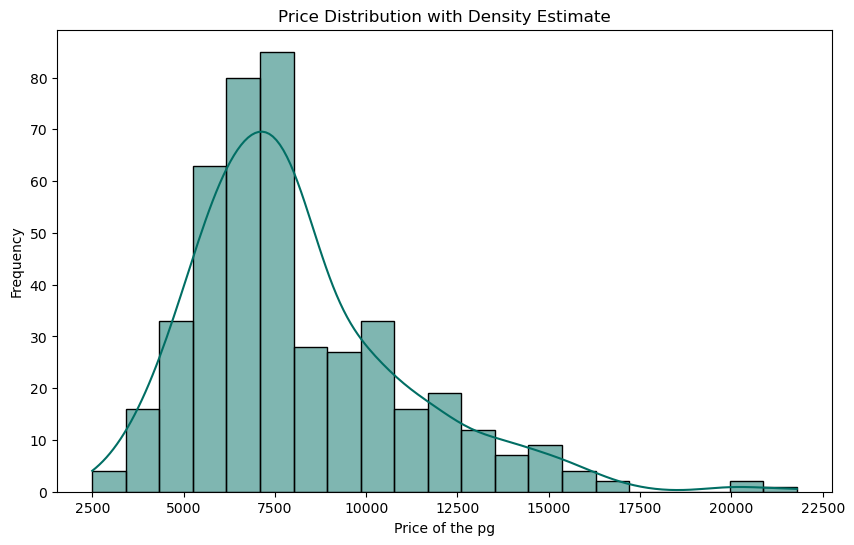

In [199]:
import matplotlib.pyplot as plt
import seaborn as sns


rgb_color = (1/255, 110/255, 100/255) 

plt.figure(figsize=(10, 6))
sns.histplot(df['Price'], kde=True, color=rgb_color)

plt.title("Price Distribution with Density Estimate")
plt.xlabel("Price of the pg")
plt.ylabel("Frequency")
plt.show()

The histogram shows the distribution of prices in the dataset. The peak occurs in the price range of 5000 to 7500, indicating that most items or listings are priced within this range. The additional density curve (KDE) helps visualize the overall trend, reinforcing that prices between 5000 and 7500 are the most common.

# kde on one columns

C:\Users\Nagendra\AppData\Local\Temp\ipykernel_53536\892352371.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Four_Share'].dropna(), color='purple', shade=True)


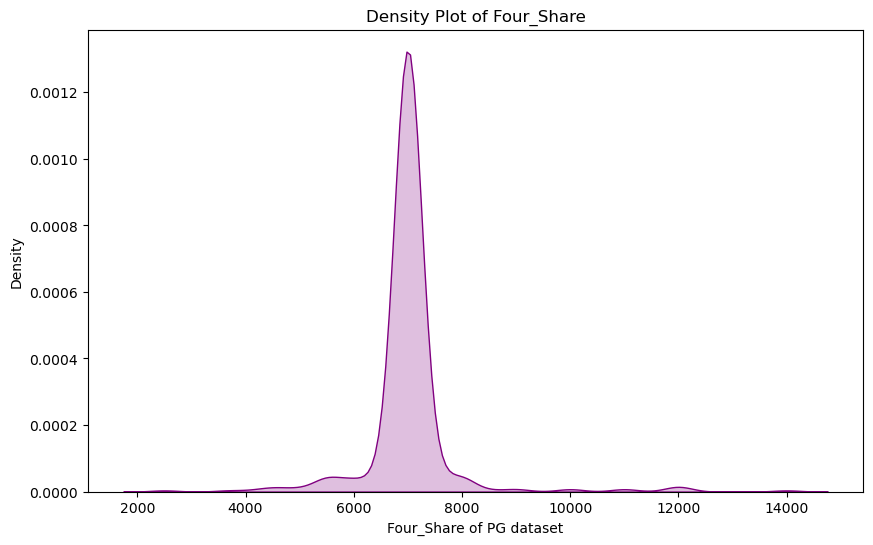

In [202]:
plt.figure(figsize=(10, 6))
sns.kdeplot(df['Four_Share'].dropna(), color='purple', shade=True)
plt.title("Density Plot of Four_Share")
plt.xlabel("Four_Share of PG dataset")
plt.ylabel("Density")
plt.show()

The density plot illustrates the distribution of the "Four_Share" variable. It shows that there is a significant peak around the value of 7500, indicating that many observations are concentrated at this price point. This suggests that 7500 is a common or popular value for "Four_Share" in the dataset.

### **Bivariate Analysis**
     * Relationships Between Categorical and Numerical Variables:
     * Use box plots to show the distribution of Price across different City values.

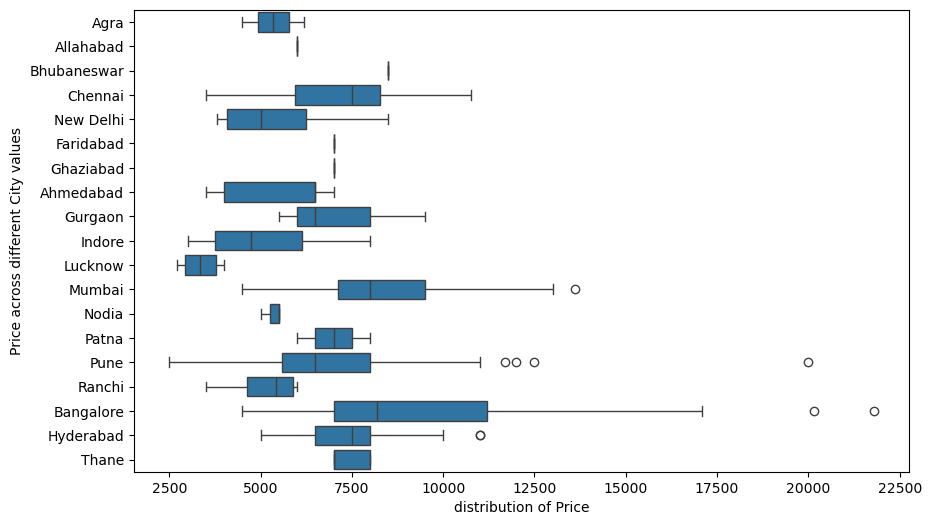

<Figure size 640x480 with 0 Axes>

In [205]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Price', y='City', data=df)
plt.xlabel("distribution of Price")
plt.ylabel("Price across different City values")
plt.show()
plt.tight_layout()

The box plot displays the distribution of prices across different cities:. Each box represents the range of prices in each city, showing the median, quartiles, and any outliers. This visualization allows us to compare how prices vary between these three cities  Chennai, Bangalore, and Mumbai, highlighting differences in pricing trends

### **Relationships Between Numerical Variables:**
      * Use scatter plots or correlation heatmaps.

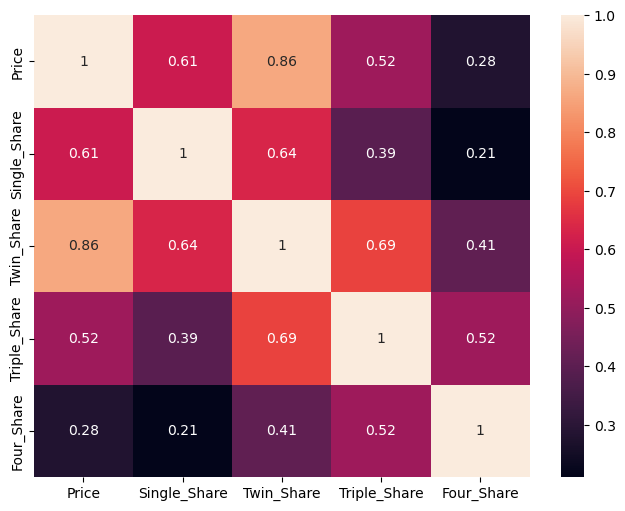

In [209]:
plt.figure(figsize=(8, 6))
sns.heatmap(df[['Price', 'Single_Share', 'Twin_Share', 'Triple_Share', 'Four_Share',]].corr(), annot=True)
plt.show()

* Price and Twin Share: A strong positive correlation of 0.86 indicates that as the price increases, the twin share also tends to increase.
* 
Single Share and Twin Share: A moderate positive correlation of 0.64 suggests that higher single shares are associated with higher twin shares.* 
Twin Share and Price: Again, a strong positive correlation of 0.86 reinforces the relationship between these two variabls* .
Triple Share and Twin Share: A moderate positive correlation of 0.69 indicates that as the triple share increases, the twin share also tends increase.
* * The heatmap helps us understand that Twin Share has strong relationships with both Price and Triple Share, while it also shows a notable connection with Single Share. This information is useful for analyzing how these variables interact with one another.her.

### kde price compare on living

<Axes: xlabel='Price', ylabel='Density'>

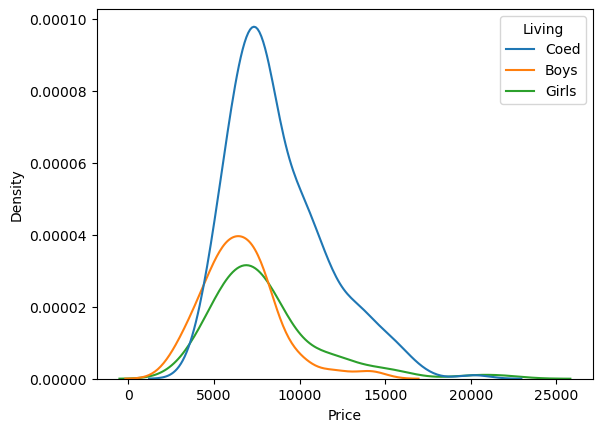

In [219]:
sns.kdeplot(data=df,x="Price",hue="Living")

* Coed Living: The price ranges from 6000 to 9500, with the highest density peak around 0.00009. This means that prices in this range are more common  among coed living arrangements.
* Boys Living: The price ranges from 4500 to 8700, with a peak density around 0.00003. This indicates that prices for boys' living arrangements are    less concentrated compared to coed living.
* Girls Living: The price ranges from 5000 to 9000, with a peak density around 0.000029. Similar to boys, the prices for girls' living arrangements are  also less concentrated than those for coed living.
* * The KDE plot shows that coed living arrangements tend to have a higher concentration of prices in the upper range compared to boys' and girls' living arrangements, which have lower peaks and a wider distribution of prices.rices.

### **Multivariate Analysis**
     pair plot

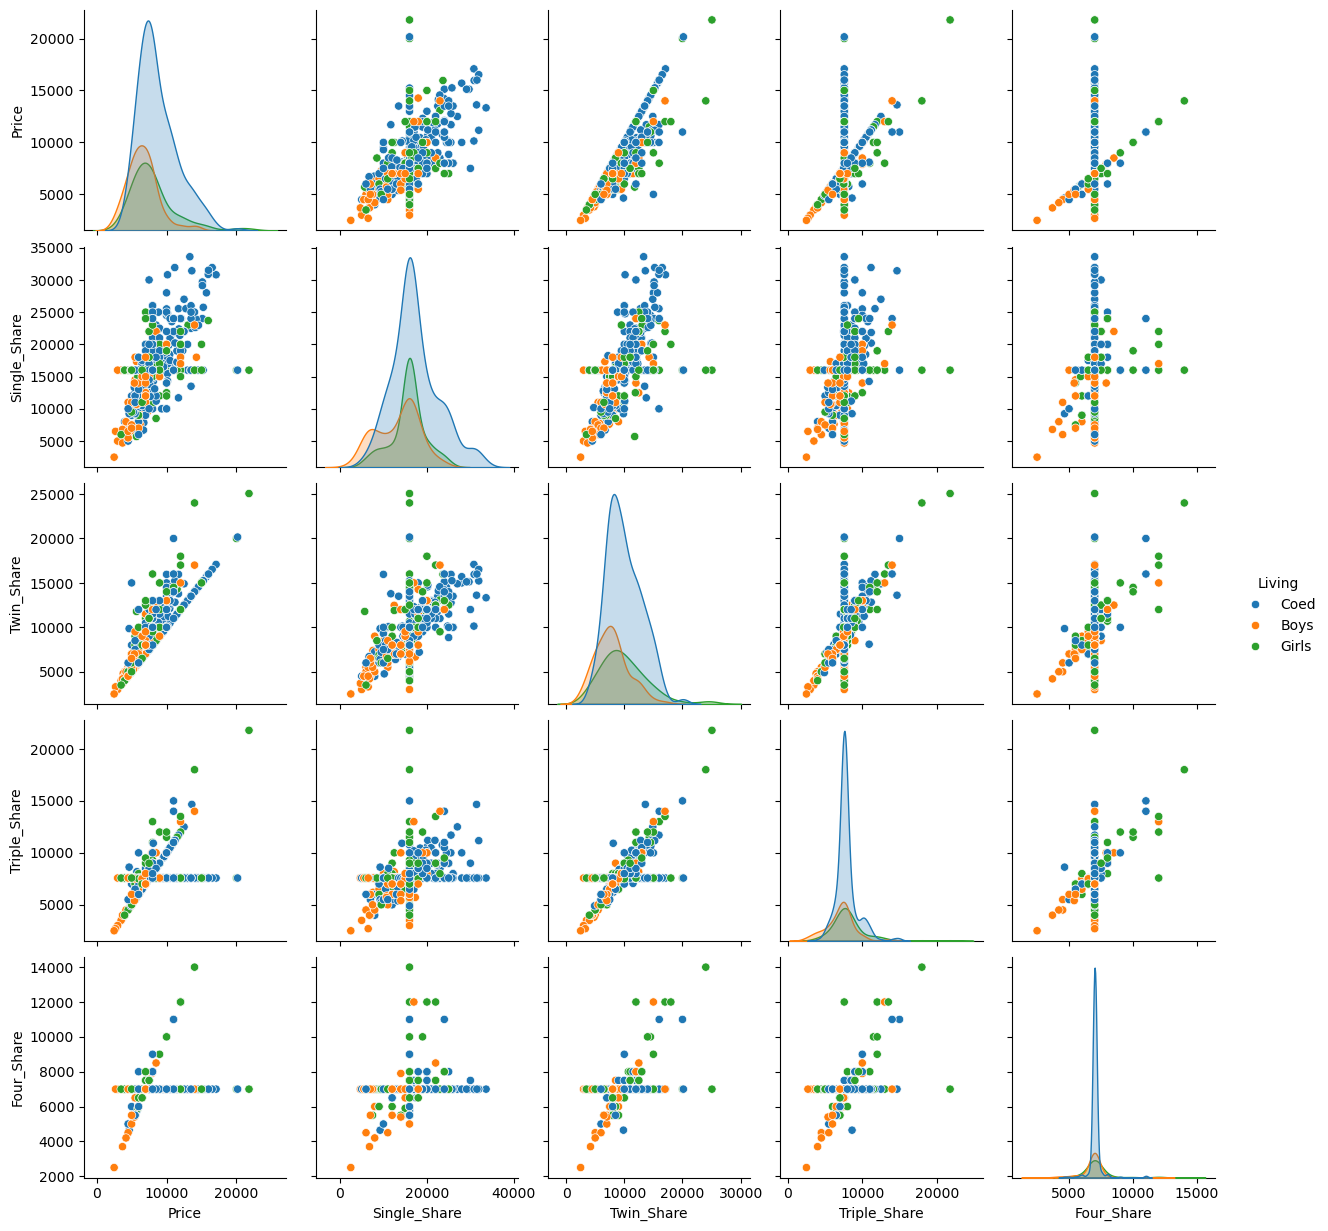

In [226]:
sns.pairplot(data=df,hue="Living")

* Scatterplots: Each pair of variables is represented by a scatterplot, allowing you to see how they relate to one another. For example, you can examine how price correlates with different types of shares (Single Share, Twin Share, etc.) for each living arrangement.

* Diagonal Histograms: The diagonal of the pair plot shows histograms for each variable, illustrating the distribution of values within that variable. This helps you understand the frequency of different price ranges or share counts.

* Hue Differentiation: The data points are colored based on the "Living" category (e.g., coed, boys, girls), making it easy to see if there are any distinct patterns or clusters based on living arrangements. You can identify how different living situations affect the relationships between the numerical variables.

## I can slove real  world problems like below .

## 1. Geographical Analysis: Average Prices by City and Location
Calculate Average Prices: Use groupby() to find the average Title_Based_Price for each city and location combination. This will help identify areas with higher or lower average prices.

In [231]:
avg_price_city = df.groupby('City')['Price'].mean().sort_values(ascending=False)
avg_price_location = df.groupby(['City', 'Location'])['Price'].mean().reset_index()

### Visualize Average Prices by City: A bar plot can help visualize the average prices across different cities.

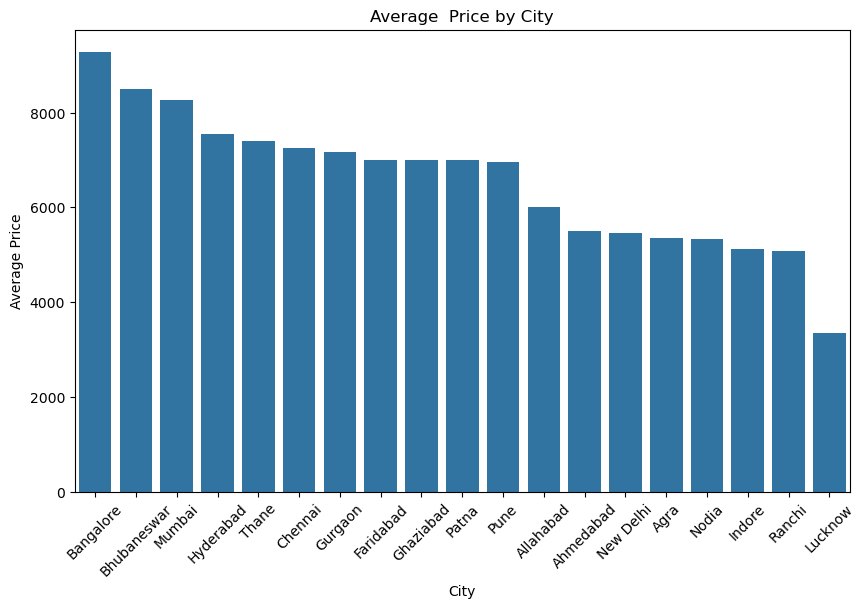

In [234]:
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_price_city.index, y=avg_price_city.values)
plt.xticks(rotation=45)
plt.title("Average  Price by City")
plt.xlabel("City")
plt.ylabel("Average Price")
plt.show()

* Cities with High Average Prices: Bangalore, Bhubaneswar, and Mumbai stand out as the cities with the highest average prices, all exceeding 8000.

* The bars for these three cities are significantly taller compared to others, indicating that living costs in these locations are notably higher.

* this visualization clearly highlights the differences in average prices among the cities, making it easy to identify where the most expensive living arrangements are located.

### Detailed Price Distribution by Location: A heatmap or scatter plot showing Title_Based_Price for location within each city can reveal patterns, such as which neighborhoods are most affordable.

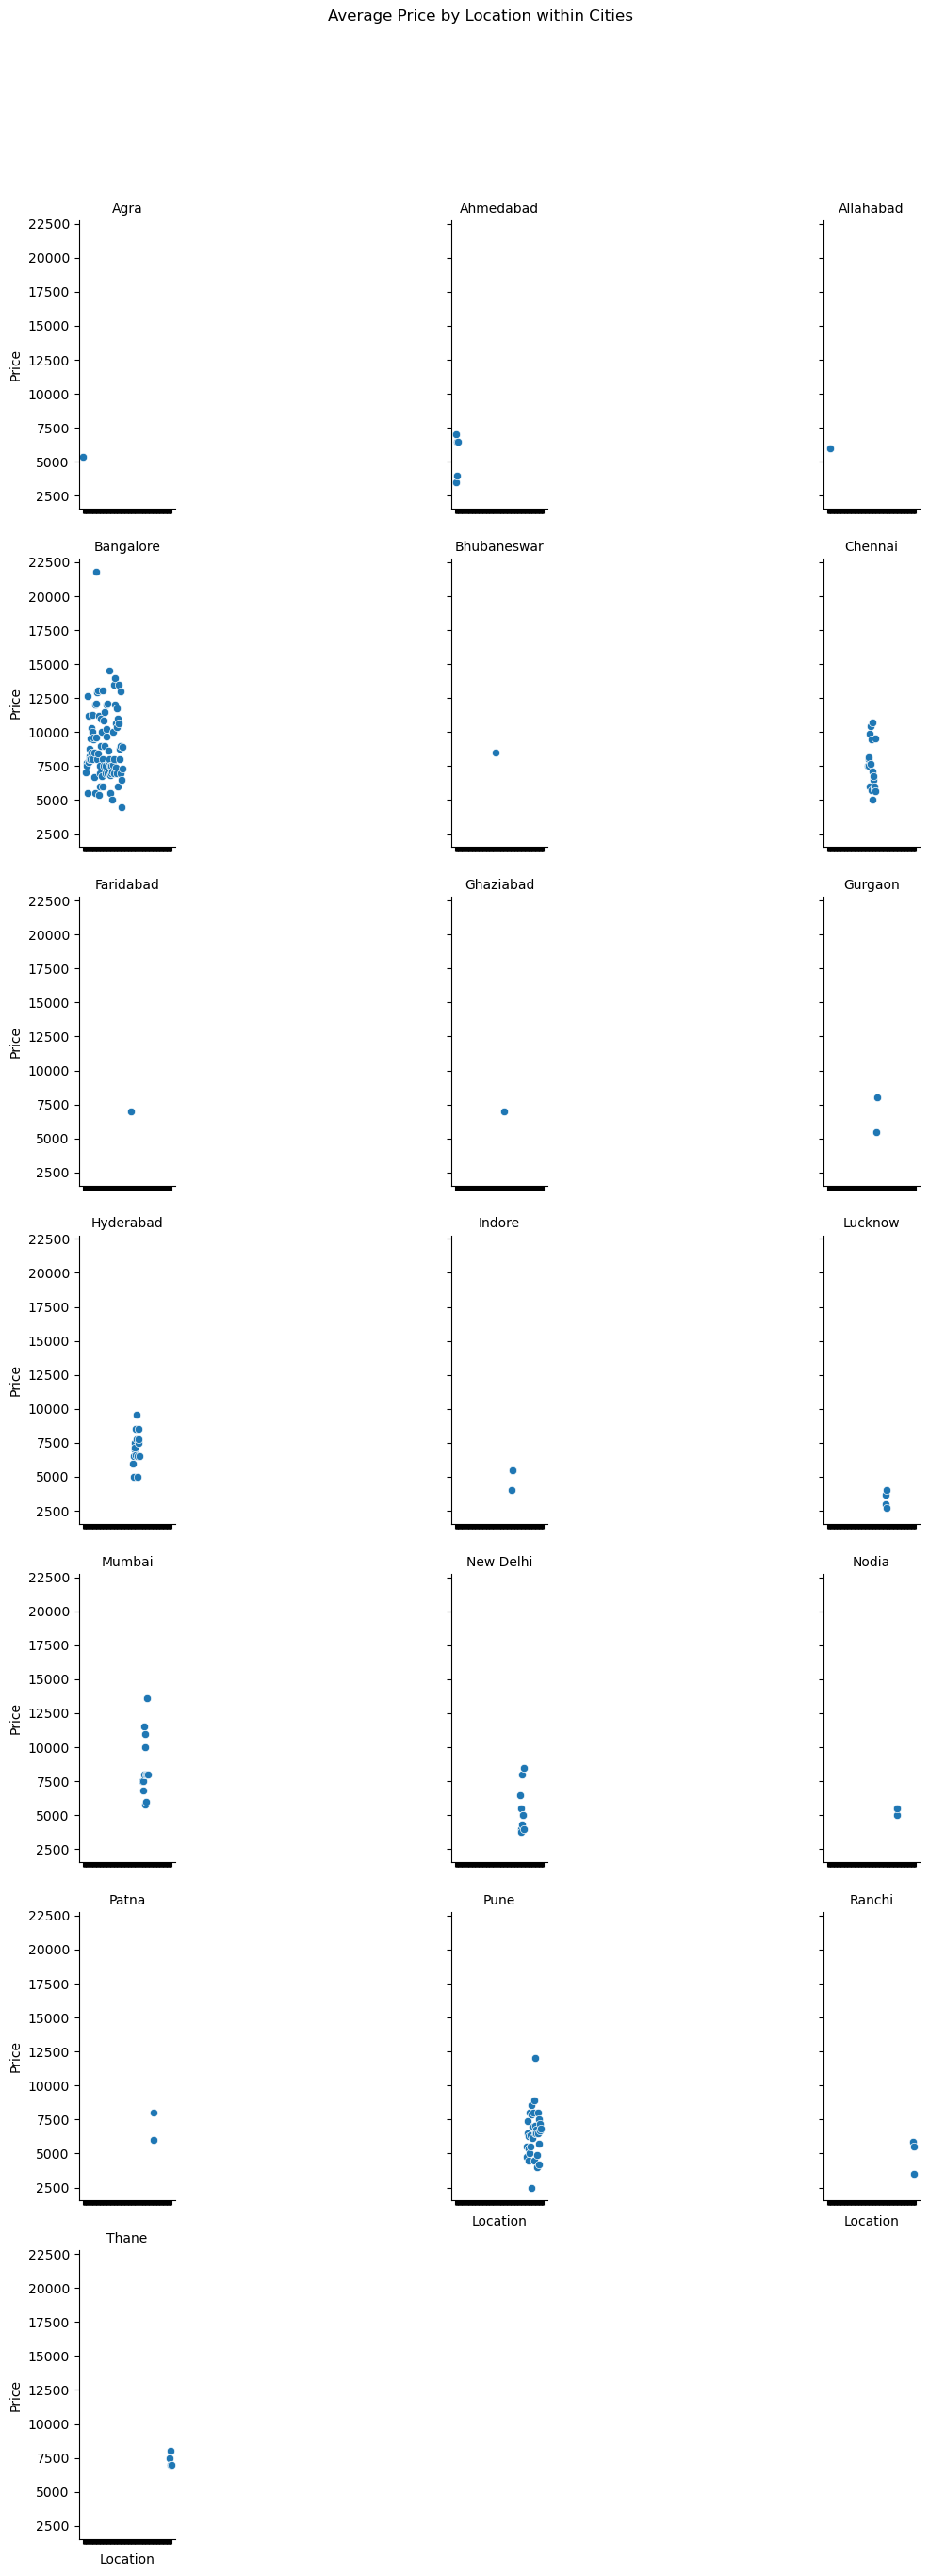

In [240]:
g = sns.FacetGrid(avg_price_location, col="City", col_wrap=3, height=4)
g.map(sns.scatterplot, "Location", "Price")
g.set_xticklabels(rotation=90)
g.set_titles(col_template="{col_name}")
plt.subplots_adjust(top=0.9)
g.fig.suptitle("Average Price by Location within Cities")
plt.show()

 the analysis highlights that Faridabad, Mumbai, and Patna are among the cities with the highest average prices for various locations, suggesting that these areas may be more desirable or have higher demand, leading to increased living costs

### 2. Analysis of Accommodation Types Across Cities

In [244]:
room_availability = df.groupby('City')[['Single_Share', 'Twin_Share', 'Triple_Share', 'Four_Share']].sum()
room_avg_prices = df.groupby('City')[['Single_Share', 'Twin_Share', 'Triple_Share', 'Four_Share']].mean()


###  **Room Type Distribution by City**:
      Create bar charts to compare the availability of different room types in each city.

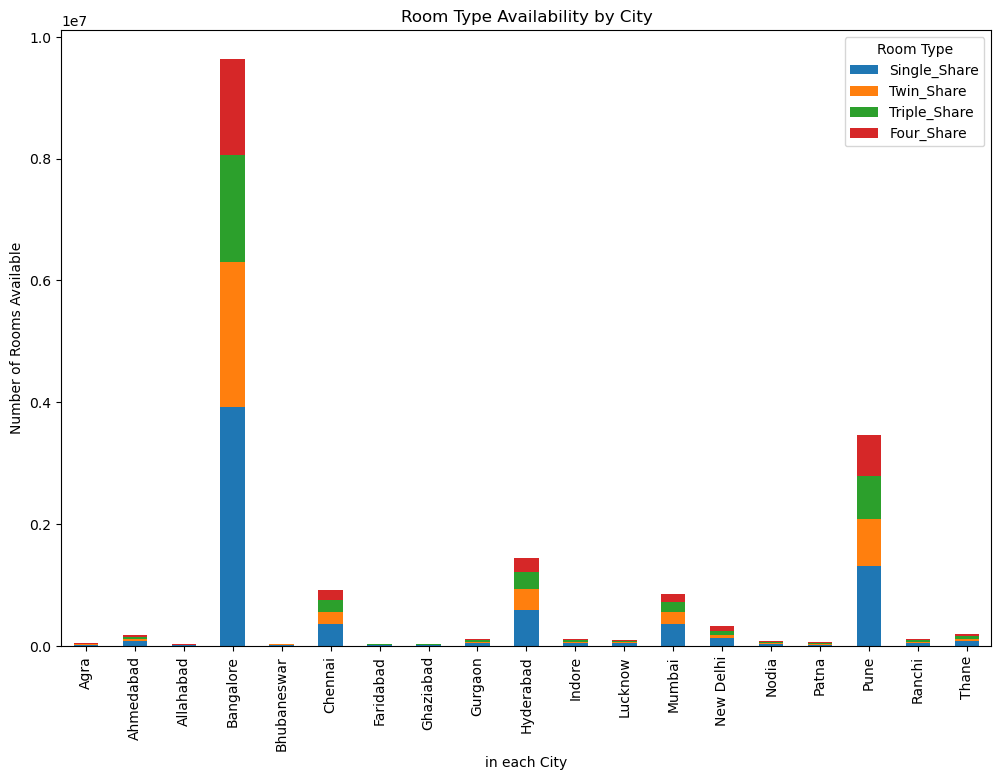

In [247]:
room_availability.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title("Room Type Availability by City")
plt.xlabel("in each City")
plt.ylabel("Number of Rooms Available")
plt.legend(title="Room Type")
plt.show()

the analysis reveals that Hyderabad, Bangalore, and Pune have a diverse range of accommodation types available, catering to the needs of different residents. The high availability of rooms in these cities indicates their popularity and capacity to support a large population, making them favorable choices for individuals seeking pg options.

### **Room Type Price Comparison**: 
     Plotting average prices for each room type across cities helps understand affordability.

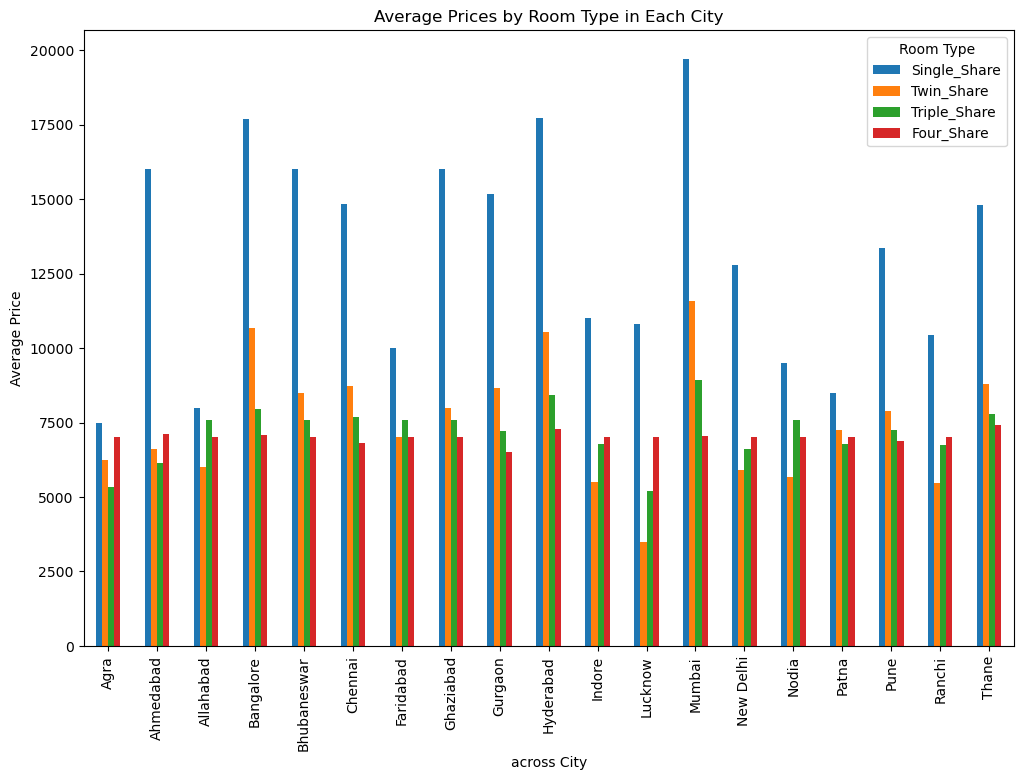

In [251]:
room_avg_prices.plot(kind='bar', figsize=(12, 8))
plt.title("Average Prices by Room Type in Each City")
plt.xlabel("across City")
plt.ylabel("Average Price")
plt.legend(title="Room Type")
plt.show()

The analysis of average room prices across cities highlights significant disparities in accommodation costs. While Mumbai, Bangalore, and Hyderabad have higher average prices, particularly for Single and Twin Share rooms, Ahmedabad stands out as a more affordable alternative. This information is crucial for individuals considering relocation or seeking accommodation, as it enables them to make informed decisions based on their budget and preferences.

### **3.how To visualize occupancy preferences by city as percentages Occupancy Preference Patterns**
     To visualize occupancy preferences by city as percentages, we can use a stacked bar chart or a heatmap.

     Heatmap for Occupancy Preference Percentages:

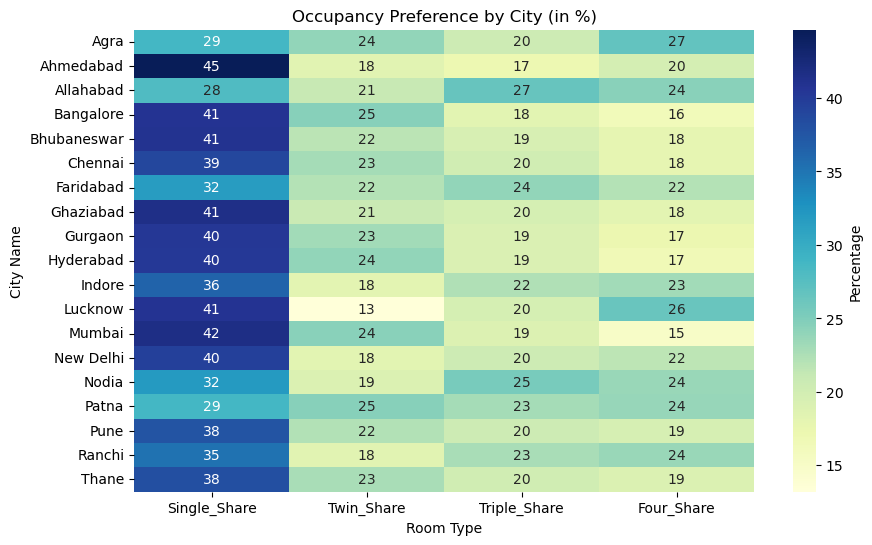

In [255]:

occupancy_preference = df.groupby('City')[['Single_Share', 'Twin_Share', 'Triple_Share', 'Four_Share']].sum()
occupancy_preference_percentage = occupancy_preference.div(occupancy_preference.sum(axis=1), axis=0) * 100


plt.figure(figsize=(10, 6))
sns.heatmap(occupancy_preference_percentage, annot=True, cmap='YlGnBu', cbar_kws={'label': 'Percentage'})
plt.title("Occupancy Preference by City (in %)")
plt.xlabel("Room Type")
plt.ylabel("City Name")
plt.show()

* single share city occupancy of min 40 % above city's ahmedabad 45% bangalore 41% bhubaneswar 41% ghaziabad 41% gurgon 40% hyd 41% lucknow 41% mubai 42% new Delhi 40%
* twin share city of min occupancy 23% above city's agra 24% bangalore 25% chennai 23% gurgon 23% hyd 24% mubai 24% patna 25%
* triple share of min occupany 25% above city's allahabad 27% nodia 25%
* four share city of min occupancy 25% above city's agra 27% luckonw 26%

* the heatmap provides a clear view of how different cities prefer various room types. Single Share rooms are particularly popular in several cities, while Twin Share rooms also show significant occupancy. The data highlights the accommodation preferences of residents, which can be useful for understanding pg trends in these city's.

### 4.where different cities has accommodation price helping us identify outliers ?

    * The boxplot visualizes the distribution of accommodation prices across different cities, helping us identify any outliers in the pricing data.


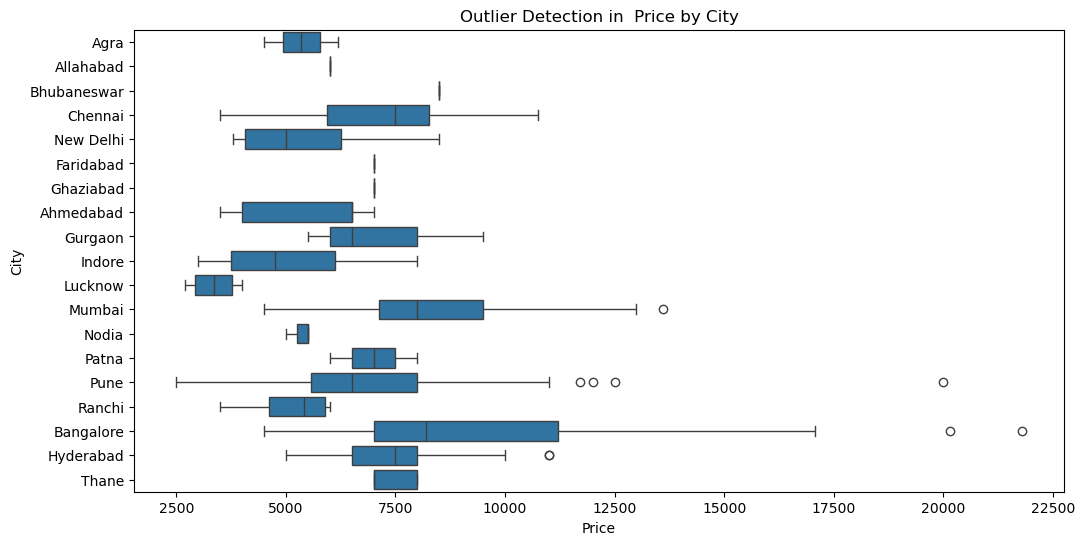

In [261]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Price', y='City', data=df)
plt.title("Outlier Detection in  Price by City")
plt.show()

The box plot displays the distribution of prices across different cities:. Each box represents the range of prices in each city, showing the median, quartiles, and any outliers. This visualization allows us to compare how prices vary between these three cities Chennai, Bangalore, and Mumbai, highlighting differences in pricing trends

### 5.Which city has the highest number of accommodations?


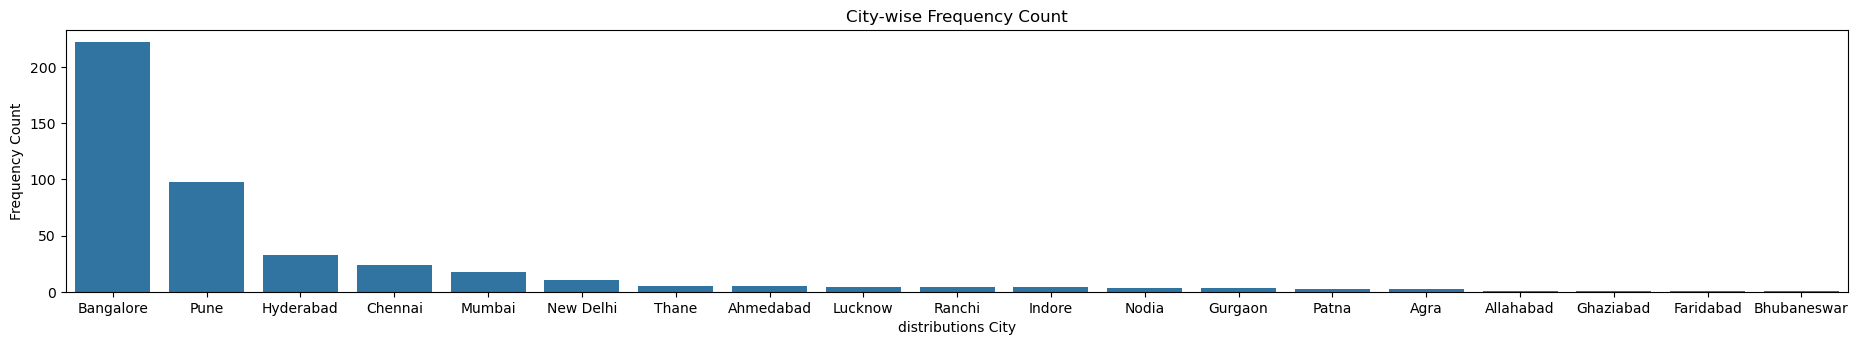

In [269]:
plt.figure(figsize=(23,3.4))
plt.title("Which city has the highest number of accommodations")
sns.countplot(x='City', data=df, order=df['City'].value_counts().index)
plt.xlabel("distributions City")
plt.ylabel("Frequency Count")
plt.show()

The countplot shows how many accommodations are available in each city. From the plot, we can see that Pune and Bangalore have the highest number of listings, with Pune having over 100 options. This means that if you're looking for a place to stay, these cities have a lot of choices available. The plot helps us understand where there are more or fewer accommodation options, which can be useful for anyone searching for a place to live.

### 6.How can this correlation information be useful for stakeholders?

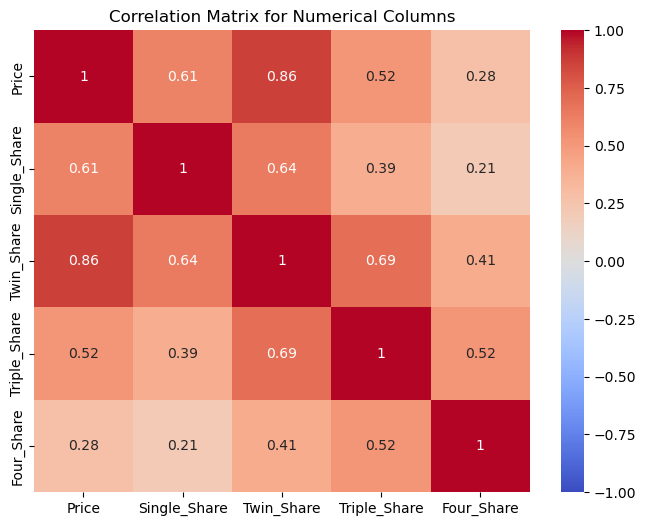

In [276]:

correlation_matrix = df[['Price', 'Single_Share', 'Twin_Share', 'Triple_Share', 'Four_Share']].corr()


plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Matrix for Numerical Columns")
plt.show()

* Understanding these correlations can help property managers, investors, or potential renters make informed decisions based on how room types relate to pricing.
* This analysis is crucial for understanding how different room types influence pricing, which can guide strategic decisions in property management, pricing strategies, and market analysis.
* Positive Correlation: A high positive correlation (close to 1) between Price and any room type indicates that as the number of that room type increases, the price tends to increase as well. This suggests that properties with more of a particular room type are generally priced higher.* 
Negative Correlation: A negative correlation (close to -1) would indicate that as one variable increases, the other decreases. For example, if Twin Share had a negative correlation with Price, it would suggest that properties with more Twin Share rooms might be priced lower* 

No Correlation: A correlation close to 0 means that there is no significant relationship between the two variab


This final summary ties together the insights and patterns you’ve observed, providing a clear overview of market trends, occupancy preferences, and possible future research directions. It gives a comprehensive understanding of the PG market landscape in various cities, offering valuable information for stakeholders, investors, or developers in the PG accommodation sector.les.


### 7.City vs Room Type Distribution Analysis?

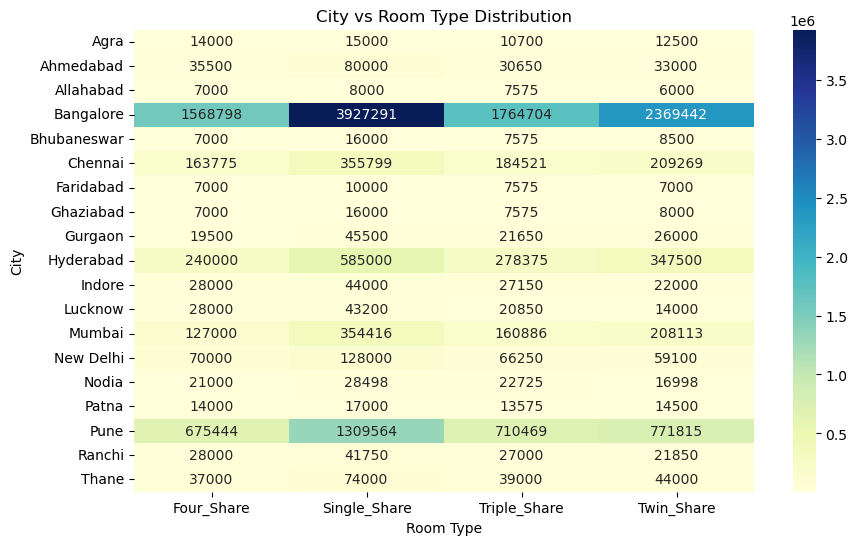

In [285]:

melted_data = df.melt(id_vars=['City'], value_vars=['Single_Share', 'Twin_Share', 'Triple_Share', 'Four_Share'], 
                      var_name='Room_Type', value_name='Count')


melted_data = melted_data.dropna(subset=['Count'])
melted_data = melted_data[melted_data['Count'] > 0]


crosstab_result = pd.crosstab(melted_data['City'], melted_data['Room_Type'], values=melted_data['Count'], aggfunc='sum').fillna(0)

# Plotting the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(crosstab_result, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title("City vs Room Type Distribution")
plt.xlabel("Room Type")
plt.ylabel("City")
plt.show()

* `Melting` the dataset allows us to transform the wide format into a long format, making it easier to analyze and visualize the counts of different room types for each city.

* The crosstab function creates a contingency table that summarizes the total counts of each room type for each city, allowing us to see the distribution of room types across cities

* The heatmap visually represents the distribution of room types in each city, making it easy to identify which cities have higher or lower counts of specific room types.

* Understanding the distribution of room types across cities can help property managers optimize their offerings and assist investors in identifying market opportunities based on demand for specific room types.

* By focusing on the relationships between cities and room types, stakeholders can make informed decisions based on the distribution of accommodations in different markets.